# Manual Mode ID II

We tweak the mode identifications obtained from peakfinding

In [1]:
from preamble import *

orig_ν = np.array(nu_guess)
orig_δν = np.array(δν_guess)

# predictions for ε from Yu et al. 2020

import pandas as pd
df = pd.read_csv("Yu et al./Epsilon.csv")

p_eps = np.polyfit(df.dnu, df.epsilon, 1)
ε_yu = np.polyval(p_eps, Δν)

masked = df[((df.dnu + df.dnuerr) > (Δν - .05))&((df.dnu - df.dnuerr) < (Δν + .05))]
dε = np.std(masked.epsilon)

/home/joel/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1.2164430672442696


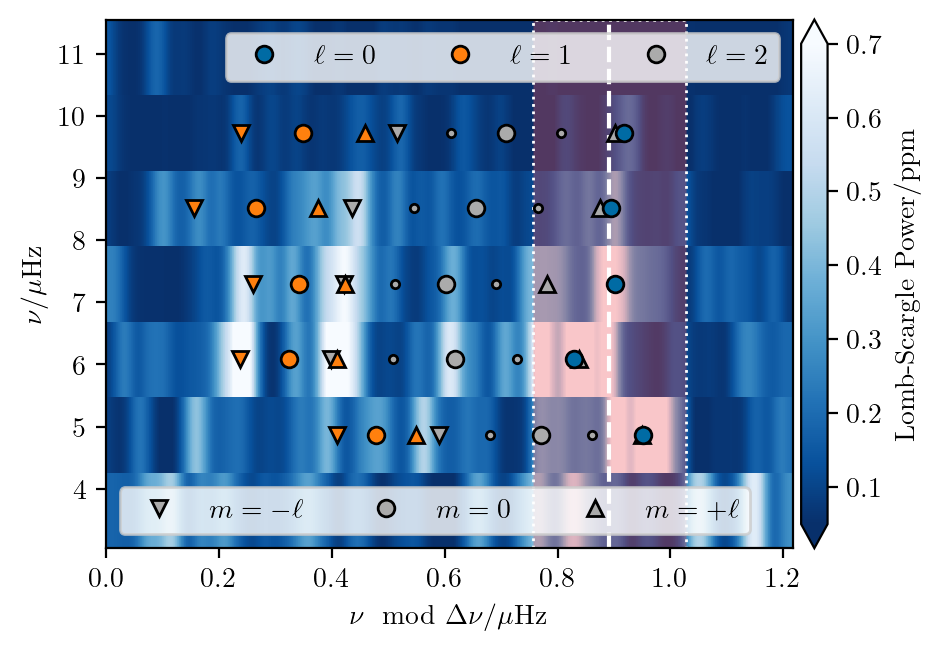

In [2]:
from preamble.data import *
print(Δν)

# manual adjustment

# nu_guess = np.array(orig_ν)
# δν_guess = np.array(orig_δν)

echelle_power_plot(ν, PS, Δν, nblur=(0, 10),
                   cmap='Blues_r', vmin=.05,
                   vmax=.7, zorder=-1)
legend = {}
handles = []

plt.axvspan((ε_yu - dε) * Δν, (ε_yu + dε) * Δν, facecolor=(1, .3, .3, .3), ls='dotted', zorder=0, edgecolor='white')
plt.axvline(ε_yu * Δν, c='white', ls='dashed', zorder=0)

for l, ν0, δν in zip(ll_guess, nu_guess, δν_guess):
    for m in range(-l, l+1):
        νi = ν0 + δν * m
        a = plt.plot(νi % Δν, (νi // Δν) * Δν, {l: '^', -l: 'v', 0: 'o'}.get(m, '.'),
                     markerfacecolor=f"C{l}",markeredgecolor='black',
                     zorder=4-l, label=f'$\ell={l}$' if (l not in legend) and m == 0 else None)
        if l == 2 and (m - l + 1) % 2:
            handles.append(a[0])
        if m == 0:
            legend[l] = None

firstlegend = plt.legend(loc='upper right', ncol=3)
plt.legend(handles, [f"$m = {_}$" for _ in (r'-\ell', '0', r'+\ell')],
           loc='lower left', ncol=3)
plt.gca().add_artist(firstlegend)

plt.colorbar(pad=.01, extend='both', label='Lomb-Scargle Power/ppm')

plt.xlabel(r"$\nu \mod \Delta\nu/\mu$Hz")
plt.ylabel(r"$\nu/\mu$Hz")

plt.tight_layout()
plt.gcf().set_size_inches(4.5,3)

plt.savefig(f"figures/echelle_id.png", bbox_inches='tight', transparent=True, dpi=300)
plt.show()

In [3]:
for s in ['nu_guess', 'δν_guess', 'll_guess']:
    thing = eval(s)
    for i, _ in enumerate(thing):
        print(f"{s}[{i}] = {_}")
    print("")

nu_guess[0] = 5.817365414861656
nu_guess[1] = 6.910838497833987
nu_guess[2] = 8.2
nu_guess[3] = 9.41
nu_guess[4] = 10.65
nu_guess[5] = 5.34392788541509
nu_guess[6] = 6.405412326669864
nu_guess[7] = 7.64
nu_guess[8] = 8.78
nu_guess[9] = 10.08
nu_guess[10] = 5.636
nu_guess[11] = 6.7
nu_guess[12] = 7.9
nu_guess[13] = 9.17
nu_guess[14] = 10.44

δν_guess[0] = 0.0
δν_guess[1] = 0.0
δν_guess[2] = 0.0
δν_guess[3] = 0.0
δν_guess[4] = 0.0
δν_guess[5] = 0.07
δν_guess[6] = 0.08611506150286295
δν_guess[7] = 0.0819886417175576
δν_guess[8] = 0.11
δν_guess[9] = 0.11
δν_guess[10] = 0.09
δν_guess[11] = 0.11
δν_guess[12] = 0.09
δν_guess[13] = 0.11
δν_guess[14] = 0.097

ll_guess[0] = 0
ll_guess[1] = 0
ll_guess[2] = 0
ll_guess[3] = 0
ll_guess[4] = 0
ll_guess[5] = 1
ll_guess[6] = 1
ll_guess[7] = 1
ll_guess[8] = 1
ll_guess[9] = 1
ll_guess[10] = 2
ll_guess[11] = 2
ll_guess[12] = 2
ll_guess[13] = 2
ll_guess[14] = 2

